In [ ]:
!pip install fairpredictor leafmap efficientnet

In [5]:
from predictor import predict
import efficientnet.keras as efn

2024-03-22 14:33:17.695903: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-22 14:33:17.750775: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-22 14:33:17.751933: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-22 14:33:18.791673: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


TFlite_runtime is not installed , Predictions with .tflite extension won't work
Raster2polygon is not installed. This option won't be available in postprocessing


In [1]:
import requests
import shutil
import leafmap
import json
import geopandas as gpd
import matplotlib.pyplot as plt


BASE_FAIR_API_URL='https://fair-dev.hotosm.org/api/v1'

def get_model(model_id):
  model_meta=requests.get(f'{BASE_FAIR_API_URL}/model/{model_id}/')
  model_meta.raise_for_status()
  model_meta=model_meta.json()
  print(model_meta)
  model_path = 'checkpoint.h5'
  url=f'{BASE_FAIR_API_URL}/workspace/download/dataset_{model_meta["dataset"]}/output/training_{model_meta["published_training"]}/checkpoint.h5'

  response = requests.get(url, stream=True)
  response.raise_for_status()
  with open(model_path, 'wb') as out_file:
    shutil.copyfileobj(response.raw, out_file)
  return model_path


def display_predictions_gdf(predictions):
  predictions_gdf = gpd.GeoDataFrame.from_features(predictions)
  predictions_gdf.plot()
  plt.show()


## Set parameters

    model_id : Model ID Published on fAIr
    zoom_level : Zoom level of the tiles to be used for prediction
    tms_url : Your Image URL on which you want to detect feature



In [2]:
model_id = 121
zoom_level = 20
tms_url = 'https://tiles.openaerialmap.org/65e4bb85e6f8d4000128235a/0/65e4bb85e6f8d4000128235b/{z}/{x}/{y}'

##  Download model from the server

In [5]:
model_path=get_model(model_id)

{'id': 121, 'name': 'Monrovia e2e', 'created_at': '2024-03-05T10:16:58.048863Z', 'last_modified': '2024-03-16T14:52:50.287500Z', 'published_training': 425, 'status': 0, 'dataset': 189, 'created_by': 7004124}


## Define bounding box for your prediction

  
  Create your area of interest from leafmap GUI

In [8]:
m = leafmap.Map(center=(6.3156, -10.8074), zoom=14)
m.add_tile_layer(url=tms_url,name="OAM Image",attribution='OAM')
m

Map(center=[6.3156, -10.8074], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zo…

### Get bounding box from map or define bbox by yourself

In [3]:
# bbox=m.user_roi_bounds()

bbox=[-10.7933, 6.3737, -10.7921, 6.3749]

## Predict

In [7]:
model_path='checkpoint.h5'

In [10]:
predictions=predict(bbox,model_path,zoom_level,tms_url,tile_overlap_distance=0.01,remove_metadata=False,multi_masks=True)
print(json.dumps(predictions))

Download starting from [492850, 505684] to [492853, 505681] using source https://tiles.openaerialmap.org/65e4bb85e6f8d4000128235a/0/65e4bb85e6f8d4000128235b/{z}/{x}/{y} - 20
Using : checkpoint.h5
It took 2 sec to load model


AttributeError: 'str' object has no attribute 'glob'

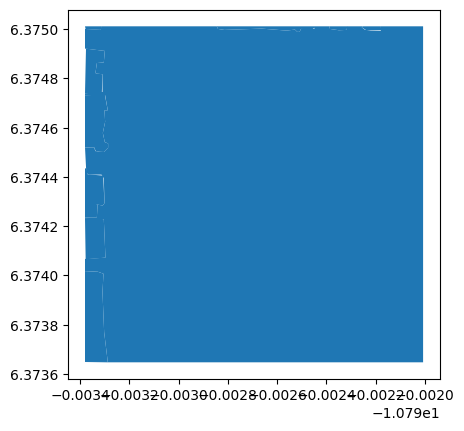

In [10]:
display_predictions_gdf(predictions)